<a href="https://colab.research.google.com/github/muhiqbalalamin/DeepLearning-UAS/blob/main/Chapter_9_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Persiapan

In [1]:
# Cek versi Python dan Scikit-Learn
import sys, sklearn
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

# Import dasar dan setup
import numpy as np
import os
import matplotlib.pyplot as plt

# Pengaturan random seed dan plotting
np.random.seed(42)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Fungsi simpan gambar
def save_fig(fig_id, tight_layout=True, ext="png", dpi=300):
    path = f"images/unsupervised_learning/{fig_id}.{ext}"
    os.makedirs(os.path.dirname(path), exist_ok=True)
    print("Saving figure:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=ext, dpi=dpi)

## Clustering

### Classification VS Clustering

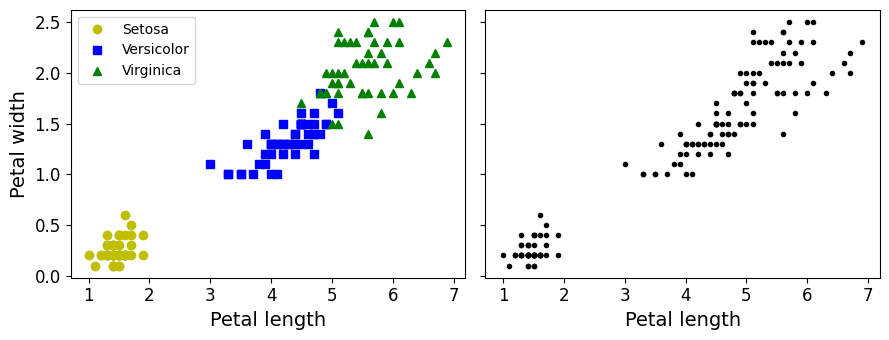

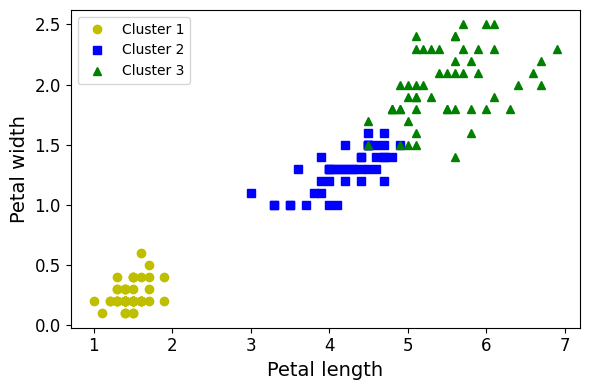

Akurasi clustering (setelah mapping): 0.97


In [2]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Load data
X, y = load_iris(return_X_y=True)

# Visualisasi data asli (berlabel)
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Virginica")
plt.xlabel("Petal length"), plt.ylabel("Petal width")
plt.legend(fontsize=10)

# Visualisasi data tanpa label
plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.tight_layout()
plt.show()

# Clustering dengan Gaussian Mixture
gmm = GaussianMixture(n_components=3, random_state=42)
y_cluster = gmm.fit_predict(X)

# Mapping hasil cluster ke label sebenarnya
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_cluster[y == class_id], keepdims=True)
    mapping[mode[0]] = class_id
y_pred = np.array([mapping[c] for c in y_cluster])

# Visualisasi hasil clustering
plt.figure(figsize=(6, 4))
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length"), plt.ylabel("Petal width")
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Evaluasi akurasi clustering
accuracy = np.mean(y_pred == y)
print(f"Akurasi clustering (setelah mapping): {accuracy:.2f}")

### K-Means

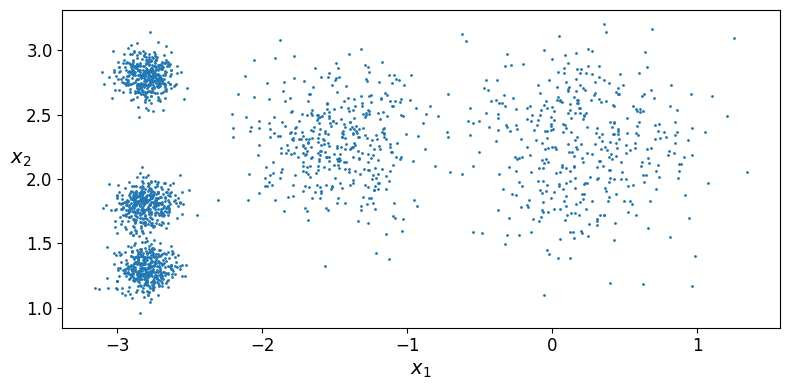

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import os

# Dataset blob buatan
centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
std_devs = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=centers, cluster_std=std_devs, random_state=7)

# Fungsi untuk plotting dan menyimpan gambar
def save_fig(name):
    path = f"images/unsupervised_learning/{name}.png"
    os.makedirs(os.path.dirname(path), exist_ok=True)
    plt.tight_layout()
    plt.savefig(path, dpi=300)

# Plot cluster
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

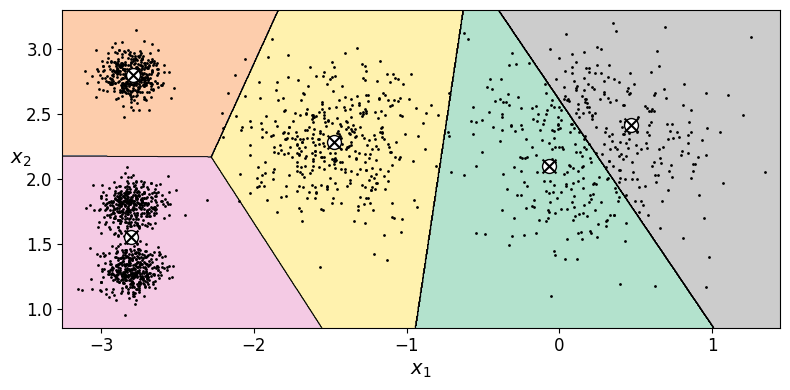

Jarak ke tiap cluster:
 [[0.12347236 2.9042344  2.83778629 1.50178217 0.62652832]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Buat data blobs
centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
std_devs = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=centers, cluster_std=std_devs, random_state=7)

# Fungsi visualisasi data & centroids
def plot_data(X): plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
def plot_centroids(centroids):
    plt.scatter(*centroids.T, marker='o', c='w', edgecolor='k', s=100, zorder=10)
    plt.scatter(*centroids.T, marker='x', c='k', s=100, zorder=11)

# Fungsi visualisasi batas keputusan
def plot_boundaries(clusterer, X):
    x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
    y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                         np.linspace(y_min, y_max, 1000))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap="Pastel2")
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    plot_data(X)
    plot_centroids(clusterer.cluster_centers_)
    plt.xlabel("$x_1$"); plt.ylabel("$x_2$", rotation=0)
    plt.tight_layout()

# Latih model KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X)

# Visualisasi
plt.figure(figsize=(8,4))
plot_boundaries(kmeans, X)
plt.show()

# Evaluasi jarak setiap titik ke seluruh pusat cluster
X_new = np.array([[0, 2]])
distances = kmeans.transform(X_new)  # jarak dari X_new ke setiap cluster
print("Jarak ke tiap cluster:\n", distances)

## The K-Means Algorithm

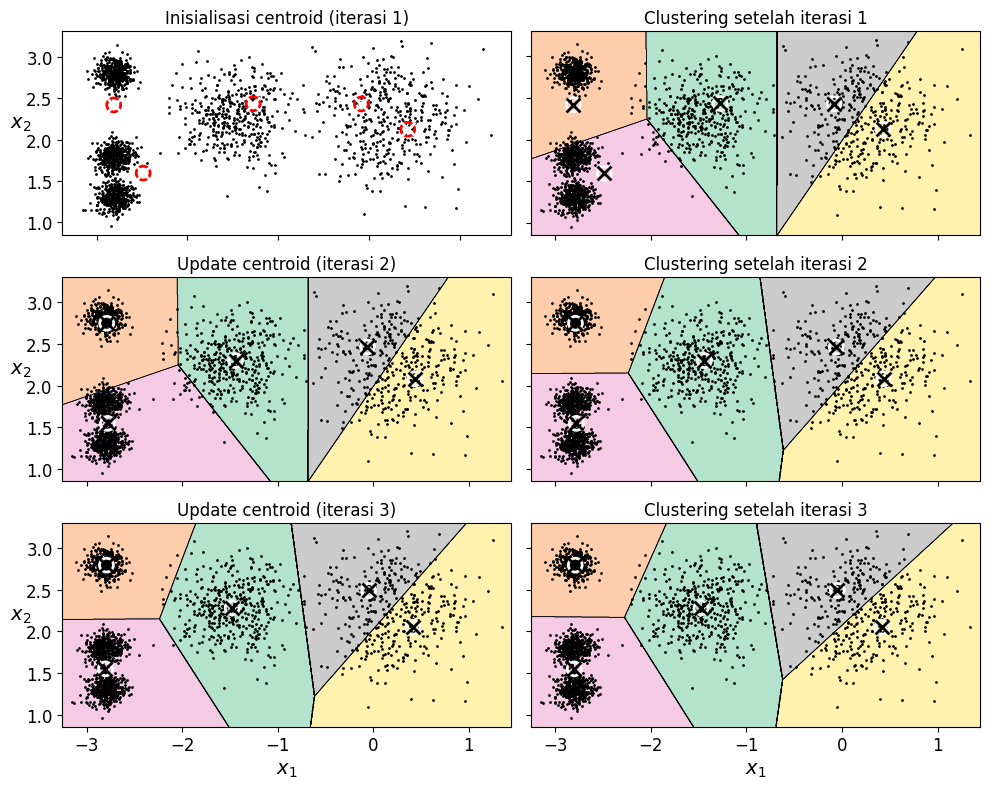

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Buat data blob
centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
std_devs = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=centers, cluster_std=std_devs, random_state=7)

# 2. Fungsi visualisasi
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                s=100, edgecolor=circle_color, facecolor='none', linewidths=2, zorder=10)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x',
                s=100, color=cross_color, linewidths=2, zorder=11)

def plot_decision_boundaries(clusterer, X, resolution=1000,
                             show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="Pastel2")
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# 3. Jalankan KMeans dengan iterasi terbatas
kmeans1 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=1,
                 algorithm='lloyd', random_state=0).fit(X)
kmeans2 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=2,
                 algorithm='lloyd', random_state=0).fit(X)
kmeans3 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=3,
                 algorithm='lloyd', random_state=0).fit(X)

# 4. Visualisasi proses iteratif
plt.figure(figsize=(10, 8))

# Iterasi 1: centroids awal
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans1.cluster_centers_, circle_color='r', cross_color='w')
plt.title("Inisialisasi centroid (iterasi 1)")
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)

plt.subplot(322)
plot_decision_boundaries(kmeans1, X, show_xlabels=False, show_ylabels=False)
plt.title("Clustering setelah iterasi 1")

# Iterasi 2: update centroid
plt.subplot(323)
plot_decision_boundaries(kmeans1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans2.cluster_centers_)
plt.title("Update centroid (iterasi 2)")

plt.subplot(324)
plot_decision_boundaries(kmeans2, X, show_xlabels=False, show_ylabels=False)
plt.title("Clustering setelah iterasi 2")

# Iterasi 3: update centroid lagi
plt.subplot(325)
plot_decision_boundaries(kmeans2, X, show_centroids=False)
plot_centroids(kmeans3.cluster_centers_)
plt.title("Update centroid (iterasi 3)")
plt.ylabel("$x_2$", rotation=0)

plt.subplot(326)
plot_decision_boundaries(kmeans3, X, show_ylabels=False)
plt.title("Clustering setelah iterasi 3")

plt.tight_layout()
plt.show()

## Mini-Batch K-Means

Inertia (MiniBatchKMeans): 3859.271235427266
Best model total inertia (last 10 iters): 1827.0870389025208
Benchmarking... (may take a few minutes)
Progress: 100/100
Benchmark selesai.


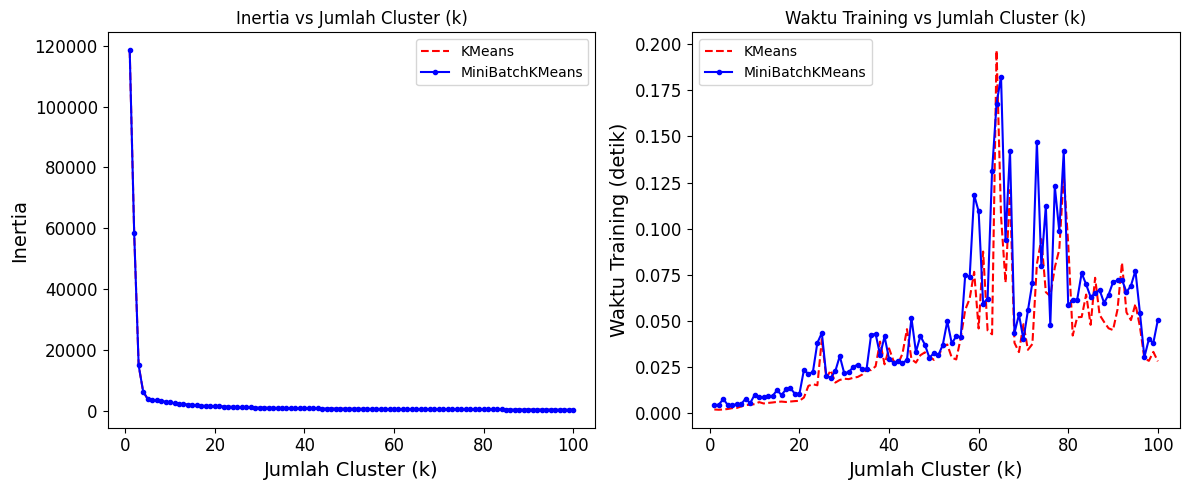

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, fetch_openml
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import train_test_split
from timeit import timeit

# Buat dataset blob untuk uji cepat
X, _ = make_blobs(n_samples=2000, centers=5, cluster_std=1.0, random_state=42)

# Latih MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)
print("Inertia (MiniBatchKMeans):", minibatch_kmeans.inertia_)

# Load dataset MNIST (dibutuhkan koneksi internet)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_train, _, y_train, _ = train_test_split(mnist.data, mnist.target.astype(int), random_state=42)

# Simpan ke memmap (hemat RAM untuk batch training)
filename = "mnist_train.memmap"
X_mm = np.memmap(filename, dtype='float32', mode='w+', shape=X_train.shape)
X_mm[:] = X_train[:]

# MiniBatchKMeans dengan partial_fit
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=100, init_size=500, random_state=42)
minibatch_kmeans.fit(X_mm)

# Fungsi bantu: ambil batch acak dari X
def load_next_batch(X, batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

# Pencarian best model berdasarkan rata-rata inertia akhir
np.random.seed(42)
k, n_init, n_iter = 5, 5, 100
evaluate_last = 10
best_kmeans = None

for i in range(n_init):
    mbk = MiniBatchKMeans(n_clusters=k, init_size=500, random_state=i)
    mbk.partial_fit(load_next_batch(X, 500))
    mbk.sum_inertia_ = 0
    for j in range(n_iter):
        mbk.partial_fit(load_next_batch(X, 100))
        if j >= n_iter - evaluate_last:
            mbk.sum_inertia_ += mbk.inertia_
    if best_kmeans is None or mbk.sum_inertia_ < best_kmeans.sum_inertia_:
        best_kmeans = mbk

print("Best model total inertia (last 10 iters):", best_kmeans.sum_inertia_)

# Benchmark waktu training
times = np.empty((100, 2))
inertias = np.empty((100, 2))

print("Benchmarking... (may take a few minutes)")
for k in range(1, 101):
    print(f"\rProgress: {k}/100", end="")
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_ = MiniBatchKMeans(n_clusters=k, random_state=42)
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=1, globals=globals())
    times[k-1, 1] = timeit("minibatch_.fit(X)", number=1, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_.inertia_
print("\nBenchmark selesai.")

# Visualisasi hasil benchmarking
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="KMeans")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="MiniBatchKMeans")
plt.title("Inertia vs Jumlah Cluster (k)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.legend()

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="KMeans")
plt.plot(range(1, 101), times[:, 1], "b.-", label="MiniBatchKMeans")
plt.title("Waktu Training vs Jumlah Cluster (k)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Waktu Training (detik)")
plt.legend()

plt.tight_layout()
plt.show()

## Finding the optimal number of clusters

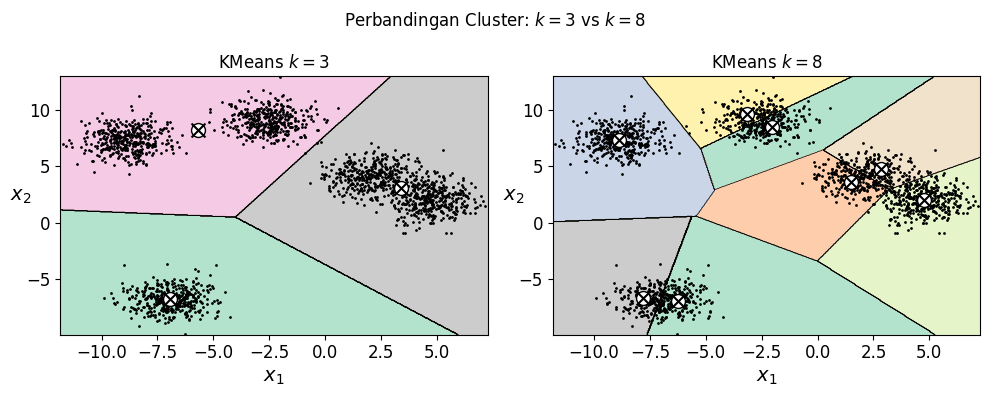


Inertia k=3: 14841.318954081418
Inertia k=8: 3047.4602634185744


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Dataset buatan
X, _ = make_blobs(n_samples=2000, centers=5, cluster_std=1.0, random_state=42)

# Fungsi bantu visualisasi boundaries dan centroid
def plot_centroids(centroids):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='white',
                edgecolor='k', s=100, zorder=10)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', s=100, zorder=11)

def plot_decision_boundaries(clusterer, X):
    x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
    y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap="Pastel2")
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
    plt.scatter(X[:, 0], X[:, 1], c='k', s=1)
    plot_centroids(clusterer.cluster_centers_)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

# Fungsi membandingkan 2 model clusterer
def plot_clusterer_comparison(model1, model2, X, label1, label2):
    model1.fit(X)
    model2.fit(X)
    plt.figure(figsize=(10, 4))

    plt.subplot(121)
    plot_decision_boundaries(model1, X)
    plt.title(f"KMeans {label1}")

    plt.subplot(122)
    plot_decision_boundaries(model2, X)
    plt.title(f"KMeans {label2}")

# 1. Bandingkan hasil clustering k=3 vs k=8
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)
plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.suptitle("Perbandingan Cluster: $k=3$ vs $k=8$")
plt.tight_layout()
plt.show()

# 2. Lihat inertia dari masing-masing k
print("\nInertia k=3:", kmeans_k3.inertia_)
print("Inertia k=8:", kmeans_k8.inertia_)

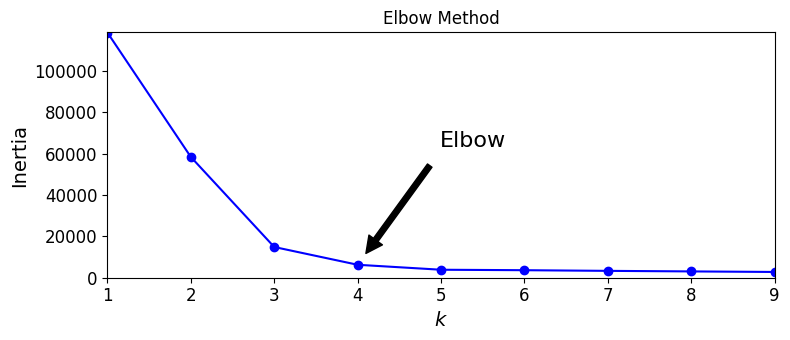

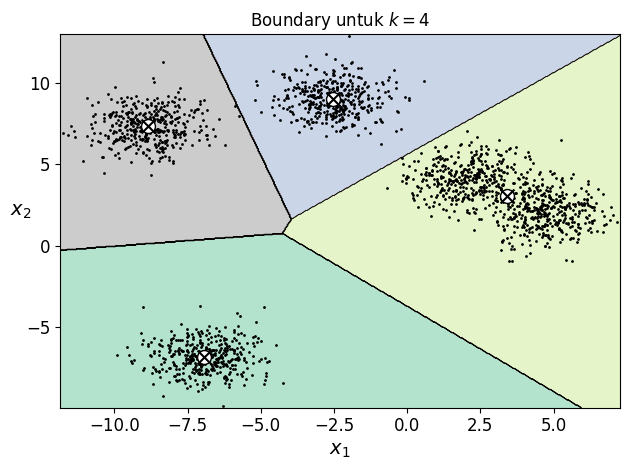

In [8]:
# 3. Elbow Method: inertia vs jumlah cluster
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title("Elbow Method")

# Tambahkan anotasi 'Elbow'
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 9, 0, max(inertias) + 100])
plt.tight_layout()
plt.show()

# 4. Visualisasi boundary terbaik (misal k=4)
plot_decision_boundaries(kmeans_per_k[3], X)
plt.title("Boundary untuk $k=4$")
plt.tight_layout()
plt.show()

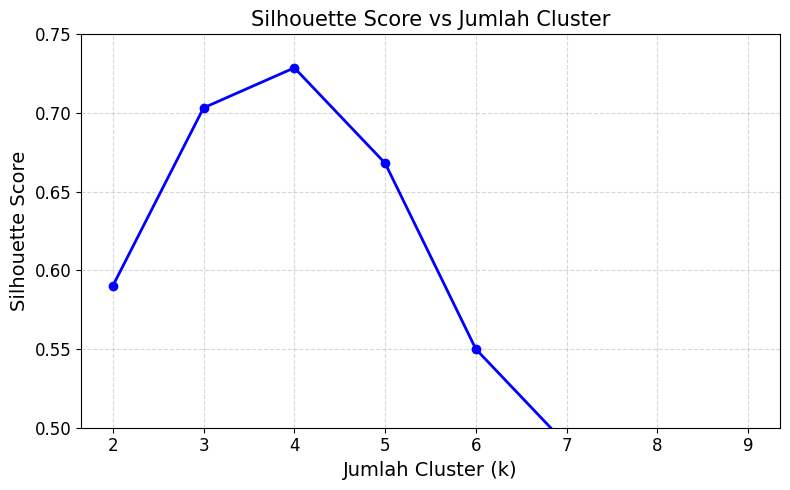

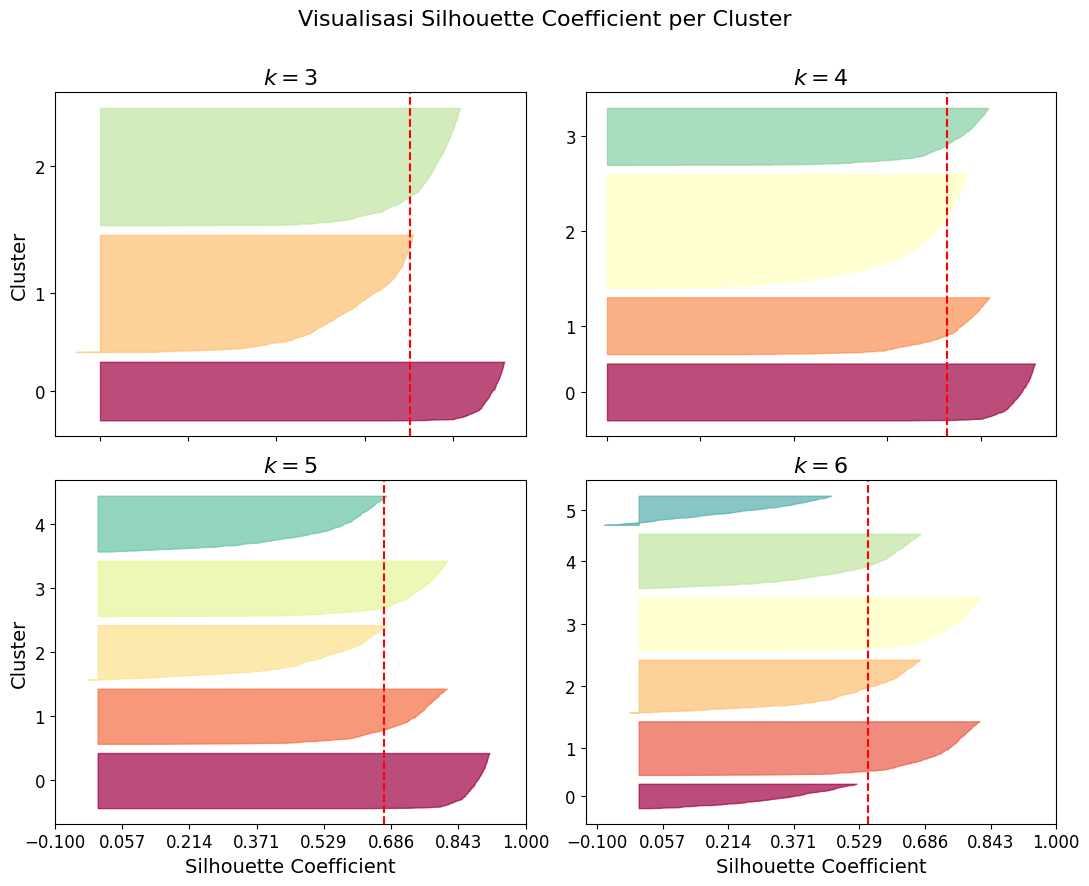

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

# Dataset buatan
X, _ = make_blobs(n_samples=2000, centers=5, cluster_std=1.0, random_state=42)

# 1. Hitung dan plot Silhouette Score untuk tiap k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 5))  # Ukuran lebih tinggi agar tidak terpotong
plt.plot(range(2, 10), silhouette_scores, "o-", color="blue", linewidth=2, markersize=6)
plt.xticks(range(2, 10))  # Pastikan seluruh k tampil
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Jumlah Cluster (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Silhouette Score vs Jumlah Cluster", fontsize=15)
plt.ylim(0.5, 0.75)  # Atur range agar semua nilai terlihat jelas
plt.tight_layout()
plt.show()

# 2. Visualisasi Silhouette Coefficient per cluster untuk k = 3, 4, 5, 6
plt.figure(figsize=(11, 9))

for idx, k in enumerate((3, 4, 5, 6), start=1):
    plt.subplot(2, 2, idx)

    model = kmeans_per_k[k - 1]
    y_pred = model.labels_
    sil_coeffs = silhouette_samples(X, y_pred)

    pos = len(X) // 30
    ticks = []

    for i in range(k):
        cluster_coeffs = sil_coeffs[y_pred == i]
        cluster_coeffs.sort()
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(cluster_coeffs)), 0, cluster_coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(cluster_coeffs) // 2)
        pos += len(cluster_coeffs) + len(X) // 30

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")
    if k in (5, 6):
        plt.xlabel("Silhouette Coefficient")
        plt.gca().set_xticks(np.linspace(-0.1, 1.0, 8))
    else:
        plt.tick_params(labelbottom=False)

    plt.title(f"$k={k}$", fontsize=16)

plt.suptitle("Visualisasi Silhouette Coefficient per Cluster", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Using Clustering for Image Segmentation

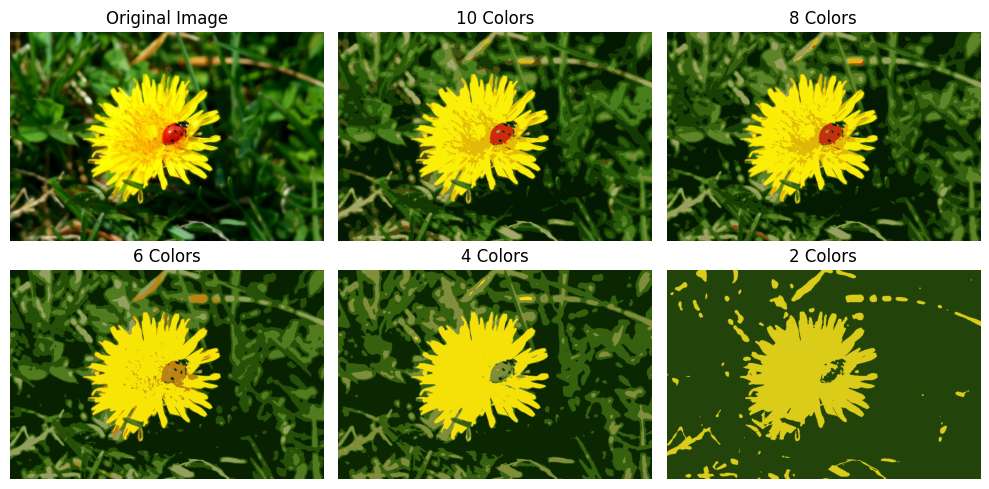

In [10]:
import os
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.cluster import KMeans

# Konfigurasi path
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
images_path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(images_path, exist_ok=True)

# Download gambar
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/ladybug.png"
filename = "ladybug.png"
filepath = os.path.join(images_path, filename)
if not os.path.exists(filepath):
    print("Downloading", filename)
    urllib.request.urlretrieve(url, filepath)

# Load gambar
image = imread(filepath)
X = image.reshape(-1, 3)  # Gambar jadi array 2D (pixel × RGB)

# Segmentasi warna dengan berbagai jumlah cluster
n_colors = [10, 8, 6, 4, 2]
segmented_imgs = []

for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    compressed = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(compressed.reshape(image.shape))

# Visualisasi hasil
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

for idx, n in enumerate(n_colors):
    plt.subplot(2, 3, idx + 2)
    plt.imshow(segmented_imgs[idx])
    plt.title(f"{n} Colors")
    plt.axis('off')

plt.tight_layout()
plt.show()

## DBSCAN

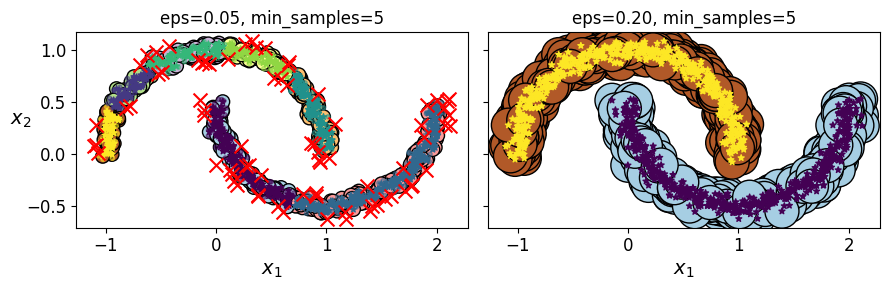

Prediksi Cluster: [1 0 1 0]
Probabilitas:
 [[0.18 0.82]
 [1.   0.  ]
 [0.12 0.88]
 [1.   0.  ]]


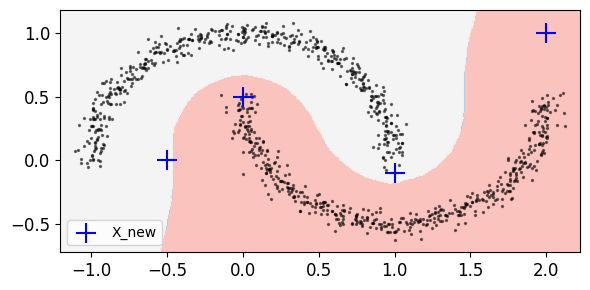

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

# Dataset berbentuk bulan sabit
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# DBSCAN clustering dengan 2 konfigurasi
dbscan1 = DBSCAN(eps=0.05, min_samples=5).fit(X)
dbscan2 = DBSCAN(eps=0.2).fit(X)  # Lebih longgar

# Fungsi visualisasi DBSCAN
def plot_dbscan(dbscan, X, size=100, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask],
                marker='o', s=size, cmap="Paired", edgecolor='k')
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".", alpha=0.5)
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="red", marker="x", s=100)

    if show_xlabels: plt.xlabel("$x_1$", fontsize=14)
    else: plt.tick_params(labelbottom=False)
    if show_ylabels: plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else: plt.tick_params(labelleft=False)

    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}", fontsize=12)

# Plot kedua DBSCAN
plt.figure(figsize=(9, 3))
plt.subplot(121)
plot_dbscan(dbscan1, X, size=100)
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.tight_layout()
plt.show()

# Gunakan model kedua (lebih longgar) untuk klasifikasi
dbscan = dbscan2

# Klasifikasi cluster baru dengan KNN, hanya gunakan core sample
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

# Prediksi cluster untuk data baru
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
predictions = knn.predict(X_new)
probabilities = knn.predict_proba(X_new)

print("Prediksi Cluster:", predictions)
print("Probabilitas:\n", probabilities)

# Visualisasi decision boundary
def plot_decision_boundaries(classifier, X, show_centroids=True):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap="Pastel1", alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c="k", s=2, alpha=0.5)
    if show_centroids and hasattr(classifier, 'cluster_centers_'):
        plt.scatter(classifier.cluster_centers_[:, 0], classifier.cluster_centers_[:, 1],
                    marker='x', c='red', s=100)

# Plot decision boundary dan titik baru
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="blue", marker="+", s=200, label="X_new")
plt.legend()
plt.tight_layout()
plt.show()

## Gaussian Mixtures

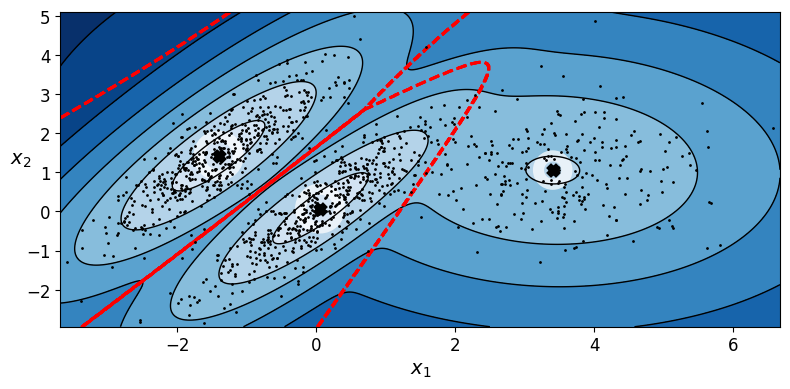

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

# Dataset gabungan (cluster + distribusi menyimpang)
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))  # rotasi/skew
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 += [6, -8]
X = np.r_[X1, X2]

# Latih Gaussian Mixture Model
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

# Prediksi & probabilitas
y_pred = gm.predict(X)
proba = gm.predict_proba(X)
X_new, y_new = gm.sample(6)  # sampling baru dari distribusi GMM

# Visualisasi GMM
def plot_centroids(centroids, weights, circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1],
                s=weights * 2000, marker='o', linewidths=8,
                facecolors='none', edgecolors=circle_color, alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=5, c=cross_color)

def plot_gaussian_mixture(clusterer, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # PDF (probability density function)
    log_pdf = -clusterer.score_samples(X_grid)
    Z = log_pdf.reshape(xx.shape)

    # Plot kontur
    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12), cmap="Blues")
    plt.contour(xx, yy, Z, levels=np.logspace(0, 2, 12),
                norm=LogNorm(vmin=1.0, vmax=30.0), colors='k', linewidths=1)

    # Tambahkan garis batas prediksi klaster
    Z_labels = clusterer.predict(X_grid).reshape(xx.shape)
    plt.contour(xx, yy, Z_labels, linewidths=2, colors='red', linestyles='dashed')

    # Plot data dan centroid
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.tight_layout()
plt.show()

# **Proses Clustering**

## 1. K-Means Clustering
Mengelompokkan data ke dalam k cluster berdasarkan jarak Euclidean.
Digunakan pada:

* Dataset sintetis (make_blobs)

* Segmentasi warna gambar ladybug.png

Visualisasi menunjukkan proses iteratif pembaruan centroid secara bertahap.
Penentuan nilai k yang optimal dilakukan menggunakan Silhouette Score.
Segmentasi gambar berhasil menyederhanakan warna menjadi 10, 8, 6, 4, dan 2 klaster.

## 2. Mini-Batch K-Means
Merupakan versi efisien dari K-Means, dirancang untuk menangani dataset berukuran besar seperti MNIST.
Menggunakan mini-batch dalam proses pembaruan centroid, sehingga mempercepat proses pelatihan.

Perbandingan dengan K-Means konvensional:

* Waktu pelatihan jauh lebih cepat

* Nilai inertia (SSE) sedikit lebih tinggi, namun performa tetap kompetitif

* Cocok untuk skenario dengan keterbatasan sumber daya komputasi dan data skala besar

## 3. DBSCAN (Density-Based Spatial Clustering)
Melakukan clustering berdasarkan kepadatan titik data.
Diuji pada dataset make_moons untuk mengidentifikasi klaster dengan bentuk non-linier.

Keunggulan:

* Mampu mengenali bentuk klaster yang kompleks

* Secara otomatis mendeteksi outlier dan menandainya sebagai noise (label = -1)

* Dapat dikombinasikan dengan KNeighborsClassifier untuk mengklasifikasikan titik baru berdasarkan core points yang telah diketahui

## 4. Gaussian Mixture Model (GMM)
Merupakan model clustering berbasis probabilistik yang mengasumsikan data berasal dari beberapa distribusi Gaussian.

Fitur yang dihasilkan:

* Probabilitas keanggotaan setiap titik terhadap masing-masing klaster

* Kemampuan untuk menghasilkan (sampling) data baru

Sangat cocok untuk:

* Klaster yang saling tumpang tindih

* Data dengan bentuk distribusi elips

Visualisasi memperlihatkan kontur distribusi, bobot masing-masing klaster, dan batas prediksi probabilistik.

# **Kesimpulan**
| Metode                 | Kelebihan                                                             | Keterbatasan                                                                                  |
| ---------------------- | --------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| **K-Means**            | Cepat dan efisien untuk klaster berbentuk bulat                       | Tidak cocok untuk bentuk non-linier dan sensitif terhadap outlier                             |
| **Mini-Batch K-Means** | Alternatif efisien K-Means, ideal untuk dataset besar                 | Akurasi sedikit dikompromikan dibanding K-Means biasa                                         |
| **DBSCAN**             | Kuat dalam deteksi bentuk klaster kompleks dan outlier                | Sensitif terhadap parameter `eps` dan `min_samples`, tidak cocok untuk data berdimensi tinggi |
| **GMM**                | Memberikan informasi probabilistik dan fleksibel dalam bentuk klaster | Lebih mahal secara komputasi dibanding K-Means                                                |
